In [1]:
import pandas as pd


In [2]:
df= pd.read_csv('carprices.csv')

In [136]:
df.shape

(13, 4)

In [137]:
df

,Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [7]:
df.rename(columns= {'Car Model' : 'Model'}, inplace=True)

In [10]:
dummies =pd.get_dummies(df.Model)

In [11]:
merged = pd.concat([df,dummies], axis='columns' )

In [23]:
merged

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [16]:
merged.drop(columns='Model', inplace=True)

In [20]:
final = merged.drop(columns='Mercedez Benz C class', inplace=True)


KeyError: "['Mercedez Benz C class'] not found in axis"

In [24]:
merged

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [25]:
from sklearn.linear_model import LinearRegression


In [27]:
linear =LinearRegression()

In [28]:
X= merged.drop(columns='Sell Price($)')

In [29]:
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [30]:
Y = merged['Sell Price($)']

In [31]:
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [32]:
linear.fit(X,Y)

LinearRegression()

In [33]:
linear.predict([[15000, 5,0,1]])

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40024.31908899])

In [34]:
linear.score(X,Y)

0.9417050937281082

In [46]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [47]:
df

,Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [82]:

le =LabelEncoder()

In [50]:
df1= df

In [51]:
df1

,Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [54]:
df1.Model=le.fit_transform(df1.Model)

In [55]:
df1

,Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [73]:
X1 = df1[['Model', 'Sell Price($)',	'Age(yrs)' ]].values
X1

array([[    1, 18000,     6],
       [    1, 34000,     3],
       [    1, 26100,     5],
       [    1, 40000,     2],
       [    1, 31500,     4],
       [    0, 29400,     5],
       [    0, 32000,     5],
       [    0, 19300,     6],
       [    0, 12000,     8],
       [    2, 22000,     6],
       [    2, 20000,     7],
       [    2, 21000,     7],
       [    2, 33000,     5]], dtype=int64)

In [75]:
y1 = df1['Sell Price($)'].values
y1

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [60]:
linear.fit(X1,y1)

LinearRegression()

In [63]:
linear.score(X1,y1)

0.8719970367825953

In [83]:
one =OneHotEncoder()
one.fit_transform(X1).toarray()
X1

array([[    1, 18000,     6],
       [    1, 34000,     3],
       [    1, 26100,     5],
       [    1, 40000,     2],
       [    1, 31500,     4],
       [    0, 29400,     5],
       [    0, 32000,     5],
       [    0, 19300,     6],
       [    0, 12000,     8],
       [    2, 22000,     6],
       [    2, 20000,     7],
       [    2, 21000,     7],
       [    2, 33000,     5]], dtype=int64)

In [84]:
linear.fit(X1,y1)

LinearRegression()

In [86]:
linear.score(X1,y1)

1.0

In [87]:
linear.predict([[ 1, 18000,     6]])

array([18000.])

In [88]:
linear.predict([[1,35000,6]])

array([35000.])

In [89]:
import matplotlib.pyplot as plt

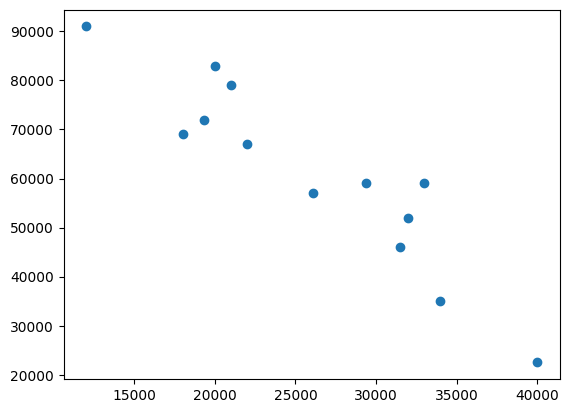

In [97]:
plt.scatter(df1['Sell Price($)'], y= df1.Mileage )

In [134]:
from sklearn.model_selection import train_test_split as tts

In [135]:
X

,Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [229]:
X_train, X_test, y_train, y_test = tts(X,Y, test_size=0.4,random_state=40)

In [230]:
len(X_train)

7

In [231]:
len(X_test)

6

In [232]:
X_train

,Model,Mileage,Age(yrs)
2,1,57000,5
0,1,69000,6
8,0,91000,8
5,0,59000,5
7,0,72000,6
11,2,79000,7
6,0,52000,5


In [233]:
linear.fit(X_train,y_train)

LinearRegression()

In [234]:
linear.predict(X_test)

array([14858.86524823, 23773.04964539, 26110.21276596, 43359.29078014,
       32519.0070922 , 37322.55319149])

In [235]:
linear.score(X_test,y_test)

0.6552066066525499